# Ridge Regression Using Gradient Descent

## Importing the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import *

__Generating the data using the class make_regression__

In [2]:
X, y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets = 1,noise= 10,random_state = 100)

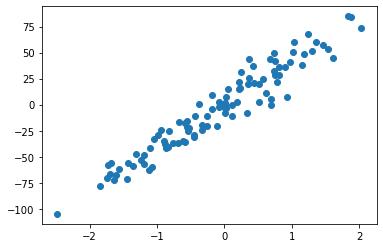

In [3]:
plt.scatter(X, y);

__Perform train test split__

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 100)

__Making our own RIDGE Regression Class__

In [5]:
class Ridge_GD:
    
    def __init__(self,epochs,learning_rate,alpha):
        
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        thetha = np.insert(self.coef_,0,self.intercept_)
        
        X_train = np.insert(X_train,0,1,axis=1)
        
        for i in range(self.epochs):
            thetha_der = np.dot(X_train.T,X_train).dot(thetha) - np.dot(X_train.T,y_train) + self.alpha*thetha
            thetha = thetha - self.learning_rate*thetha_der
        
        self.coef_ = thetha[1:]
        self.intercept_ = thetha[0]
    
    def predict(self,X_test):
        
        return np.dot(X_test,self.coef_) + self.intercept_

In [6]:
reg = Ridge_GD(epochs=500,alpha=0.001,learning_rate=0.005)
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score : ",r2_score(y_test,y_pred))
print("coefficient : ", reg.coef_)
print("intercept : ",reg.intercept_)

R2 score :  0.8498856266811117
coefficient :  [41.54805159]
intercept :  0.661622278264284


## Sklearn Ridge Regression

In [7]:
from sklearn.linear_model import Ridge

In [8]:
reg1 = Ridge(alpha=0.001, max_iter=500,solver='sparse_cg')

In [9]:
reg1 = Ridge_GD(epochs=500,alpha=0.001,learning_rate=0.005)
reg1.fit(X_train,y_train)

y_pred = reg1.predict(X_test)
print("R2 score : ",r2_score(y_test,y_pred))
print("coefficient : ", reg1.coef_)
print("intercept : ",reg1.intercept_)

R2 score :  0.8498856266811117
coefficient :  [41.54805159]
intercept :  0.661622278264284


### Conclusion :
* The coefficient and intercept for both sklearn Ridge class and the class defined by our own are same.
* Also, r2scores for both the classes are also equal.
* Hence, we have developed our own Ridge Regression Class using Gradient Descent.